Loss: 2.2932
Loss: 2.2772
Loss: 2.2688
Loss: 2.2527
Loss: 2.2310
Loss: 2.2260
Loss: 2.2079
Loss: 2.1842
Loss: 2.1642
Loss: 2.1497
Loss: 2.1340
Loss: 2.1231
Loss: 2.0977
Loss: 2.0444
Loss: 2.0210
Loss: 1.9924
Loss: 1.9979
Loss: 1.9646
Loss: 1.9312
Loss: 1.8520
Loss: 1.8434
Loss: 1.7774
Loss: 1.6909
Loss: 1.6632
Loss: 1.6734
Loss: 1.5973
Loss: 1.4752
Loss: 1.5742
Loss: 1.5528
Loss: 1.4981
Accuracy of the network on the 10000 test images: 64.05 %
Saved PyTorch Model State to model.pth
Predicted: "Ankle boot", Actual: "Ankle boot"


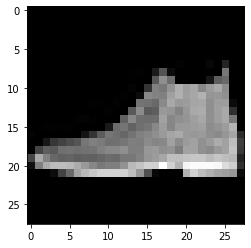

In [43]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot

no_epochs = 5
batch_size = 100

train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                          train = True,
                                          transform = transforms.ToTensor(),
                                          download = True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                          train = False,
                                          transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

loss = nn.CrossEntropyLoss()
optmizer = torch.optim.SGD(model.parameters(), lr=0.001)

# train the model
for epoch in range(no_epochs):
    for i, (X, y) in enumerate(train_loader):  
        X = X.reshape(-1, 28*28)
        
        # Forward pass
        y_pred = model(X)
        loss_fn = loss(y_pred, y)
        
        # Backward and optimize
        loss_fn.backward()
        optmizer.step()
        optmizer.zero_grad()

        
        if (i+1) % 100 == 0:
            print (f'Loss: {loss_fn.item():.4f}')
        
        
# test the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for test_x, test_y in test_loader:
        test_x = test_x.reshape(-1, 28*28)
        y_pred = model(test_x)
        _, predicted = torch.max(y_pred.data, 1)
        n_samples += test_y.size(0)
        n_correct += (predicted == test_y).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")
model.load_state_dict(torch.load("model.pth"))

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_dataset[0][0], test_dataset[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    
    pyplot.imshow(test_dataset[0][0].reshape((28, 28)), cmap="gray")
